# This is calculations of the data of distance to CBS. Where scores are also given

In [4]:
import pandas as pd
import numpy as np
#Importing the file of distance to CBS.
data = pd.read_csv (r'C:\Users\Sander\Desktop\Real_estate\with_distance_to_CBS.csv')
df = pd.DataFrame(data, columns= ['distance to CBS'])
print('BEFORE removing stuff')
print(df)

# changing to data to integer.
df = df.fillna(0)
df['distance to CBS'] =df['distance to CBS'].astype(int) #
print('AFTER removing stuff')
print(df)

BEFORE removing stuff
      distance to CBS
0            4.136997
1            7.659486
2            8.268506
3            8.268506
4            4.362046
...               ...
2653         0.453841
2654         6.951792
2655         3.613957
2656         3.511867
2657         2.133454

[2658 rows x 1 columns]
AFTER removing stuff
      distance to CBS
0                   4
1                   7
2                   8
3                   8
4                   4
...               ...
2653                0
2654                6
2655                3
2656                3
2657                2

[2658 rows x 1 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000153A49428B0>]],
      dtype=object)

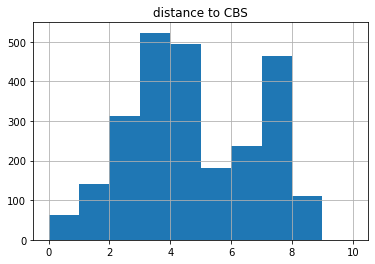

In [21]:
# histogram
%matplotlib inline 
#using a range of 0-10, because there are some outliers.
df.hist('distance to CBS', bins=10, range=[0, 10])

# Are there many outliers or big numbers in the data column of distance to cbs? checking this with max and mean...

In [16]:
print(df.mean())
print(df.max())
# I feel like there could be a lot of outliers or mistakes in the data on distance? Why are some of the distances so big?

distance to CBS    319.281791
dtype: float64
distance to CBS    7444
dtype: int32


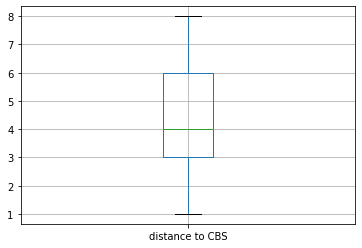

In [29]:
#Here i filter out all the outliers or big distances/bugs, to get a better overview of the data.
q_low = df['distance to CBS'].quantile(0.00)
q_hi  = df['distance to CBS'].quantile(0.95)

df_filtered = df[(df['distance to CBS'] < q_hi) & (df['distance to CBS'] > q_low)]
df_filtered.boxplot('distance to CBS')

# Creating the scores for the different distances to cbs

In [34]:
#creating a new column with score rating/points from 0-5, where 5 is the best score.
def rating_distance(df):
    if (df['distance to CBS'] < 1):
        return 5
    elif (df['distance to CBS'] < 3):
        return 4
    elif (df['distance to CBS'] < 5):
        return 3
    elif (df['distance to CBS'] < 7):
        return 2
    elif (df['distance to CBS'] < 9):
        return 1
    elif (df['distance to CBS'] < 11):
        return 0
    elif (df['Price_per_room'] > 12):
        return np.nan
    
df['distance_score'] = df.apply(rating_distance, axis = 1)
df = df.fillna(0)
df['distance_score'] = df['distance_score'].astype(int)
print(df)

      distance to CBS  distance_score
0                   3               3
1                   1               4
2                   1               4
3                   1               4
4                   3               3
...               ...             ...
2653                5               2
2654                2               4
2655                3               3
2656                3               3
2657                4               3

[2658 rows x 2 columns]
